In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('combined_dataset.csv')


In [11]:
df.sample(5)

,target,text
6325,ham,"Come round, it's ."
3919,ham,eastrans nomination change effective 2 / 2 / 0...
1385,spam,18 yearold cocksuckers ! download hot teen mov...
3721,ham,eastrans nomination change effective 2 / 3 / 0...
8022,ham,No * am working on the ringing u thing but hav...


In [12]:
df.shape

(10961, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10961 entries, 0 to 10960
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10961 non-null  object
 1   text    10961 non-null  object
dtypes: object(2)
memory usage: 171.4+ KB


In [14]:
df

,target,text
0,spam,Congratulations! You've been selected for a lu...
1,spam,URGENT: Your account has been compromised. Cli...
2,spam,You've won a free iPhone! Claim your prize by ...
3,spam,Act now and receive a 50% discount on all purc...
4,spam,Important notice: Your subscription will expir...
...,...,...
10956,spam,Hey little one! Exciting news! Mama and baby a...
10957,spam,Amazing DATA deals on your Pulse Plan today! D...
10958,spam,Special offer just for you! Get 1GB @15 bob va...
10959,spam,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target']=encoder.fit_transform(df['target'])

In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

674

In [19]:
df.drop_duplicates(keep='first',inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df['target'].value_counts()

target
0    8014
1    2273
Name: count, dtype: int64

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\souvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_char']=df['text'].apply(len)

In [25]:
df

,target,text,num_char
0,1,Congratulations! You've been selected for a lu...,90
1,1,URGENT: Your account has been compromised. Cli...,89
2,1,You've won a free iPhone! Claim your prize by ...,72
3,1,Act now and receive a 50% discount on all purc...,72
4,1,Important notice: Your subscription will expir...,94
...,...,...,...
10956,1,Hey little one! Exciting news! Mama and baby a...,244
10957,1,Amazing DATA deals on your Pulse Plan today! D...,119
10958,1,Special offer just for you! Get 1GB @15 bob va...,116
10959,1,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...,196


In [26]:
from nltk.tokenize import word_tokenize
df['tokens'] = df['text'].apply(lambda x: word_tokenize(str(x)))

In [27]:
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(str(x))))

In [28]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [29]:
df

,target,text,num_char,tokens,num_words,num_sentences
0,1,Congratulations! You've been selected for a lu...,90,"[Congratulations, !, You, 've, been, selected,...",17,3
1,1,URGENT: Your account has been compromised. Cli...,89,"[URGENT, :, Your, account, has, been, compromi...",16,2
2,1,You've won a free iPhone! Claim your prize by ...,72,"[You, 've, won, a, free, iPhone, !, Claim, you...",17,2
3,1,Act now and receive a 50% discount on all purc...,72,"[Act, now, and, receive, a, 50, %, discount, o...",16,2
4,1,Important notice: Your subscription will expir...,94,"[Important, notice, :, Your, subscription, wil...",16,2
...,...,...,...,...,...,...
10956,1,Hey little one! Exciting news! Mama and baby a...,244,"[Hey, little, one, !, Exciting, news, !, Mama,...",49,4
10957,1,Amazing DATA deals on your Pulse Plan today! D...,119,"[Amazing, DATA, deals, on, your, Pulse, Plan, ...",27,2
10958,1,Special offer just for you! Get 1GB @15 bob va...,116,"[Special, offer, just, for, you, !, Get, 1GB, ...",29,3
10959,1,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...,196,"[NEW, ARRIVAL, -, JUNE, 23RD, Dresses, @, 300,...",37,1


In [30]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,10287.000000,10287.000000,10287.000000
mean,547.908136,121.975697,7.515019
std,1169.208660,260.724382,20.336708
min,1.000000,0.000000,0.000000
25%,56.000000,14.000000,1.000000
50%,139.000000,30.000000,3.000000
75%,516.000000,119.000000,7.000000
max,31851.000000,8861.000000,1204.000000


In [31]:
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,8014.000000,8014.000000,8014.000000
mean,465.523709,109.791490,6.133891
std,1021.944118,247.481892,17.546399
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,103.000000,25.000000,2.000000
75%,418.000000,101.000000,6.000000
max,31851.000000,8861.000000,1204.000000


In [32]:
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,2273.000000,2273.000000,2273.000000
mean,838.373955,164.934008,12.384514
std,1548.335568,298.952585,27.497647
min,1.000000,0.000000,0.000000
25%,143.000000,28.000000,2.000000
50%,268.000000,54.000000,5.000000
75%,781.000000,163.000000,12.000000
max,21740.000000,3961.000000,693.000000


<Axes: xlabel='num_char', ylabel='Count'>

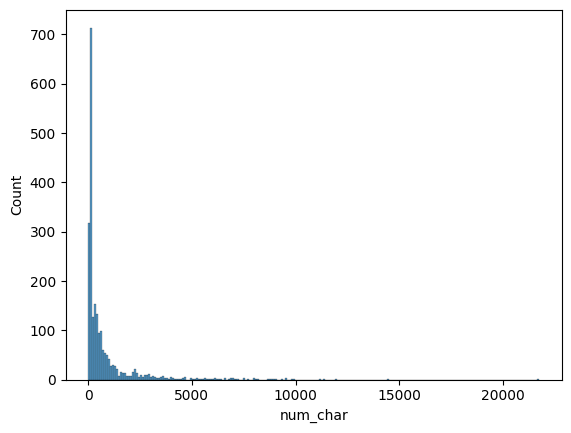

In [33]:
import seaborn as sns
sns.histplot(df[df['target'] == 1]['num_char'])


<Axes: xlabel='num_char', ylabel='Count'>

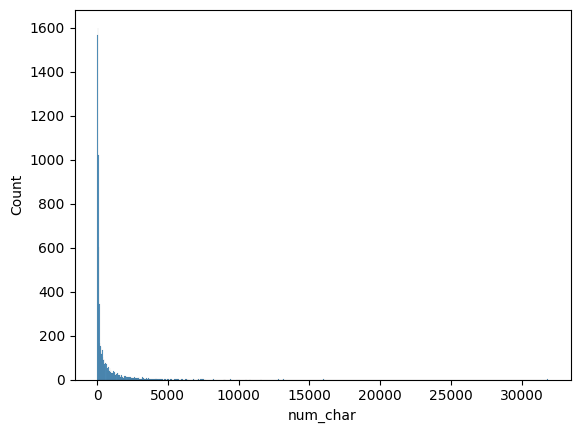

In [34]:
sns.histplot(df[df['target'] == 0]['num_char'])

<Axes: xlabel='num_words', ylabel='Count'>

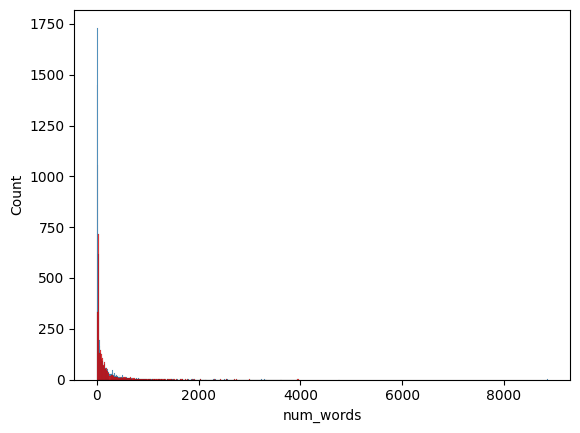

In [35]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

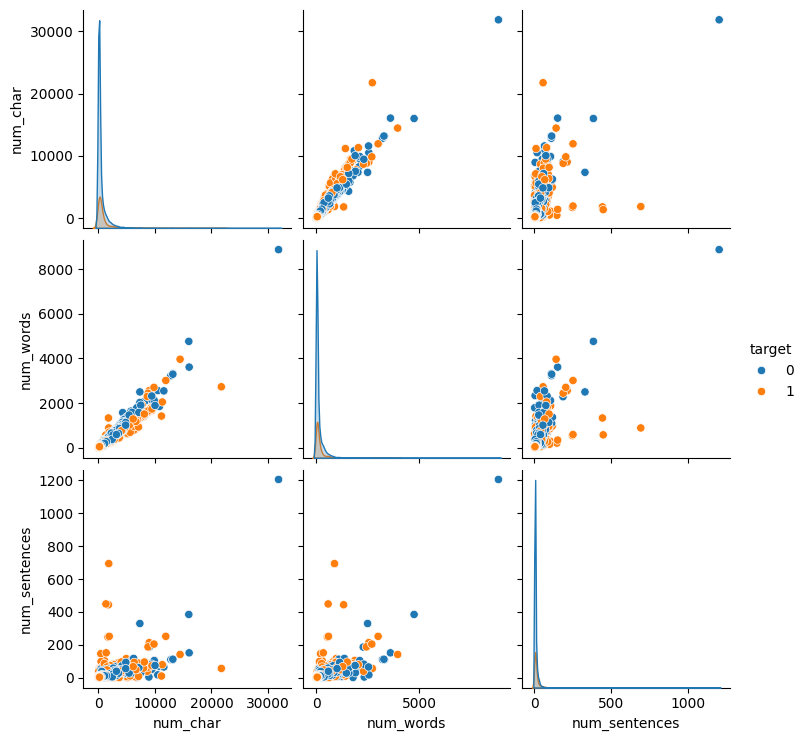

In [36]:
sns.pairplot(df,hue='target')

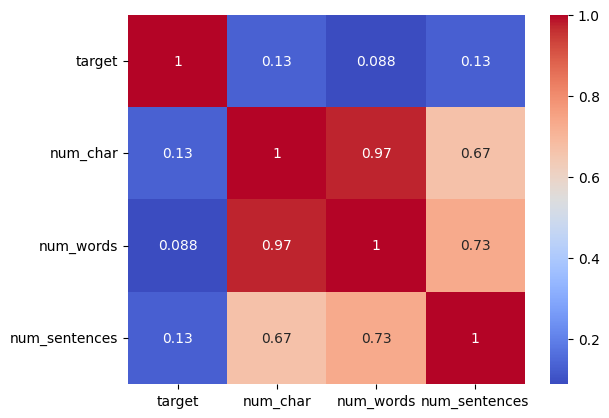

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\souvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [40]:
ps=PorterStemmer()

In [41]:
import string

In [42]:
from nltk.tokenize import word_tokenize
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
df['Transformed_text'] = df['text'].apply(transform_text)

In [44]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=50,min_font_size=10,background_color='white')

In [46]:
df.rename(columns={'Transformed_text' : 'transformed_text'},inplace=True)


In [47]:
df

,target,text,num_char,tokens,num_words,num_sentences,transformed_text
0,1,Congratulations! You've been selected for a lu...,90,"[Congratulations, !, You, 've, been, selected,...",17,3,congratul select luxuri vacat getaway claim prize
1,1,URGENT: Your account has been compromised. Cli...,89,"[URGENT, :, Your, account, has, been, compromi...",16,2,urgent account compromis click reset password ...
2,1,You've won a free iPhone! Claim your prize by ...,72,"[You, 've, won, a, free, iPhone, !, Claim, you...",17,2,free iphon claim prize click link
3,1,Act now and receive a 50% discount on all purc...,72,"[Act, now, and, receive, a, 50, %, discount, o...",16,2,act receiv 50 discount purchas limit time offer
4,1,Important notice: Your subscription will expir...,94,"[Important, notice, :, Your, subscription, wil...",16,2,import notic subscript expir soon renew avoid ...
...,...,...,...,...,...,...,...
10956,1,Hey little one! Exciting news! Mama and baby a...,244,"[Hey, little, one, !, Exciting, news, !, Mama,...",49,4,hey littl one excit news mama babi sweet deal ...
10957,1,Amazing DATA deals on your Pulse Plan today! D...,119,"[Amazing, DATA, deals, on, your, Pulse, Plan, ...",27,2,amaz data deal puls plan today dial 406 2 enjo...
10958,1,Special offer just for you! Get 1GB @15 bob va...,116,"[Special, offer, just, for, you, !, Get, 1GB, ...",29,3,special offer get 1gb 15 bob valid 1 hour dial...
10959,1,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...,196,"[NEW, ARRIVAL, -, JUNE, 23RD, Dresses, @, 300,...",37,1,new arriv june 23rd dress 300 kondel branch dr...


In [48]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

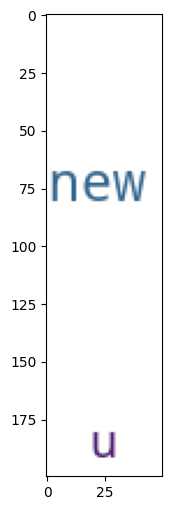

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)


208346

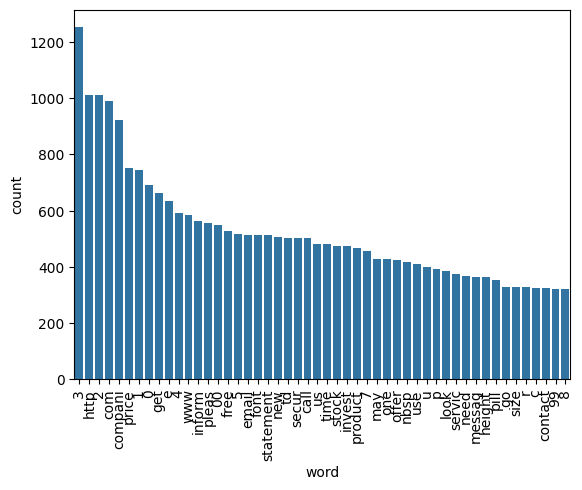

In [51]:
from collections import Counter 
spam_common_df = pd.DataFrame(Counter(spam_corpus).most_common(50), columns=['word', 'count'])

# Plot using keyword arguments
sns.barplot(x='word', y='count', data=spam_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

410331

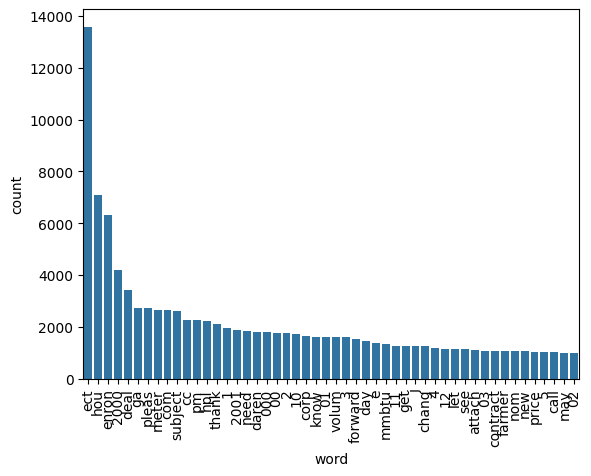

In [54]:
from collections import Counter 
ham_common_df = pd.DataFrame(Counter(ham_corpus).most_common(50), columns=['word', 'count'])

# Plot using keyword arguments
sns.barplot(x='word', y='count', data=ham_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df

,target,text,num_char,tokens,num_words,num_sentences,transformed_text
0,1,Congratulations! You've been selected for a lu...,90,"[Congratulations, !, You, 've, been, selected,...",17,3,congratul select luxuri vacat getaway claim prize
1,1,URGENT: Your account has been compromised. Cli...,89,"[URGENT, :, Your, account, has, been, compromi...",16,2,urgent account compromis click reset password ...
2,1,You've won a free iPhone! Claim your prize by ...,72,"[You, 've, won, a, free, iPhone, !, Claim, you...",17,2,free iphon claim prize click link
3,1,Act now and receive a 50% discount on all purc...,72,"[Act, now, and, receive, a, 50, %, discount, o...",16,2,act receiv 50 discount purchas limit time offer
4,1,Important notice: Your subscription will expir...,94,"[Important, notice, :, Your, subscription, wil...",16,2,import notic subscript expir soon renew avoid ...
...,...,...,...,...,...,...,...
10956,1,Hey little one! Exciting news! Mama and baby a...,244,"[Hey, little, one, !, Exciting, news, !, Mama,...",49,4,hey littl one excit news mama babi sweet deal ...
10957,1,Amazing DATA deals on your Pulse Plan today! D...,119,"[Amazing, DATA, deals, on, your, Pulse, Plan, ...",27,2,amaz data deal puls plan today dial 406 2 enjo...
10958,1,Special offer just for you! Get 1GB @15 bob va...,116,"[Special, offer, just, for, you, !, Get, 1GB, ...",29,3,special offer get 1gb 15 bob valid 1 hour dial...
10959,1,NEW ARRIVAL - JUNE 23RD Dresses @ 300; Kondel...,196,"[NEW, ARRIVAL, -, JUNE, 23RD, Dresses, @, 300,...",37,1,new arriv june 23rd dress 300 kondel branch dr...


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['transformed_text'],df['target'].values,
    test_size=0.15,
    random_state=42,
    stratify=df['target'].values
)


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [89]:
X_train_vec = tfidf.fit_transform(X_train).toarray()
X_test_vec = tfidf.transform(X_test).toarray()

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8743,)
(1544,)
(8743,)
(1544,)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score


In [92]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lsvc = CalibratedClassifierCV(estimator=LinearSVC(), cv=5)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
gnb =GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [93]:
clfs = {
    'LR': lrc, 
    'SVC' : svc,
    'LSVC' : lsvc,
    'KN' : knc, 
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'DT': dtc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'xgb':xgb  
}

In [94]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [95]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_vec,y_train,X_test_vec,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9287564766839378
Precision -  0.9169675090252708
For  SVC
Accuracy -  0.957901554404145
Precision -  0.9451612903225807


c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value

For  LSVC
Accuracy -  0.9585492227979274
Precision -  0.9235474006116208
For  KN
Accuracy -  0.8387305699481865
Precision -  1.0
For  GNB
Accuracy -  0.7992227979274611
Precision -  0.5260504201680672
For  MNB
Accuracy -  0.9436528497409327
Precision -  0.907051282051282
For  BNB
Accuracy -  0.8944300518134715
Precision -  0.8449612403100775
For  DT
Accuracy -  0.8607512953367875
Precision -  0.8315789473684211
For  RF
Accuracy -  0.9514248704663213
Precision -  0.9433333333333334
For  AdaBoost
Accuracy -  0.9261658031088082
Precision -  0.8770764119601329
For  ETC
Accuracy -  0.9585492227979274
Precision -  0.9396825396825397
For  xgb
Accuracy -  0.939119170984456
Precision -  0.9363957597173145


In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [97]:
performance_df

,Algorithm,Accuracy,Precision
2,LSVC,0.958549,0.923547
10,ETC,0.958549,0.939683
1,SVC,0.957902,0.945161
8,RF,0.951425,0.943333
5,MNB,0.943653,0.907051
11,xgb,0.939119,0.936396
0,LR,0.928756,0.916968
9,AdaBoost,0.926166,0.877076
6,BNB,0.894430,0.844961
7,DT,0.860751,0.831579


In [98]:
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score

linear_svc = CalibratedClassifierCV(estimator=LinearSVC(), cv=5)

voting = VotingClassifier(
    estimators=[
        ('svm', linear_svc),
        ('mnb', MultinomialNB()),
        ('etc', ExtraTreesClassifier(n_estimators=50, random_state=2))
    ],
    voting='soft'
)

voting.fit(X_train_vec, y_train)
y_pred = voting.predict(X_test_vec)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value

Accuracy 0.9630829015544041
Precision 0.9409937888198758


In [99]:
estimators=[('svm', linear_svc), ('mnb', mnb), ('etc', etc)]
final_estimator=RandomForestClassifier()

In [100]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train_vec,y_train)
y_pred = clf.predict(X_test_vec)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\souvi\Desktop\Spam_Classification_Project\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value

Accuracy 0.9656735751295337
Precision 0.9363636363636364


In [101]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))

In [102]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [103]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [104]:
data.drop_duplicates(inplace=True)

In [105]:
data.duplicated().sum()

0

In [106]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [107]:
data.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'},inplace=True)

In [108]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [109]:
data.rename(columns={'v1' : 'target' , 'v2' : 'text'},inplace=True)

In [110]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [111]:
data['target']=encoder.fit_transform(data['target'])

In [112]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [113]:
print(data.duplicated().sum())
print(data.isnull().sum())

0
target    0
text      0
dtype: int64


In [114]:
data['transformed_text'] = data['text'].apply(transform_text)

In [115]:
import pickle
tfidf = pickle.load(open(r'vectorizer.pkl', 'rb'))
model = pickle.load(open(r'model.pkl', 'rb'))

In [116]:
X1_test = tfidf.transform(data['transformed_text']).toarray()
Y1_actual = data['target'].values

In [117]:
Y1_predict = model.predict(X1_test)
print("Accuracy",accuracy_score(Y1_actual,Y1_predict))
print("Precision",precision_score(Y1_actual,Y1_predict))

Accuracy 0.9945830915070614
Precision 0.9875195007800313
